<a href="https://colab.research.google.com/github/aysbt/DataScienceCourse/blob/master/Human_Resource_quit_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
# include the full link to the csv file containing your dataset
!cp gdrive/'My Drive'/'Colab Notebooks'/data/Human_Resources.csv .
employee_df = pd.read_csv('Human_Resources.csv')

In [23]:
employee_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [24]:
employee_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [25]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [26]:
# Let's replace 'Attritition' , 'overtime' , 'Over18' column with integers before performing any visualizations 
employee_df['Attrition'] = employee_df['Attrition'].apply(lambda x:1 if x == 'Yes' else 0)


In [27]:
employee_df['OverTime'] = employee_df['OverTime'].apply(lambda x:1 if x == 'Yes' else 0)
employee_df['Over18'] = employee_df['Over18'].apply(lambda x:1 if x == 'Y' else 0)

In [28]:
employee_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,1,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,1,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,1,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,1,0,12,3,4,80,1,6,3,3,2,2,2,2


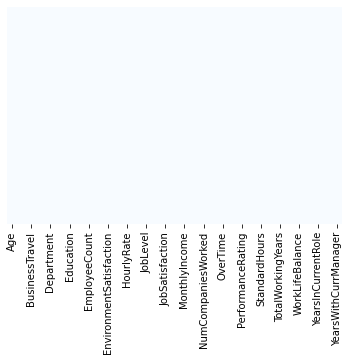

In [29]:
# Let's see if we have any missing data, luckily we don't!
sns.heatmap(employee_df.isnull(), yticklabels=False, cbar=False, cmap='Blues')

## VISUALIZE DATASET










array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7af95562b0>,
      dtype=object)

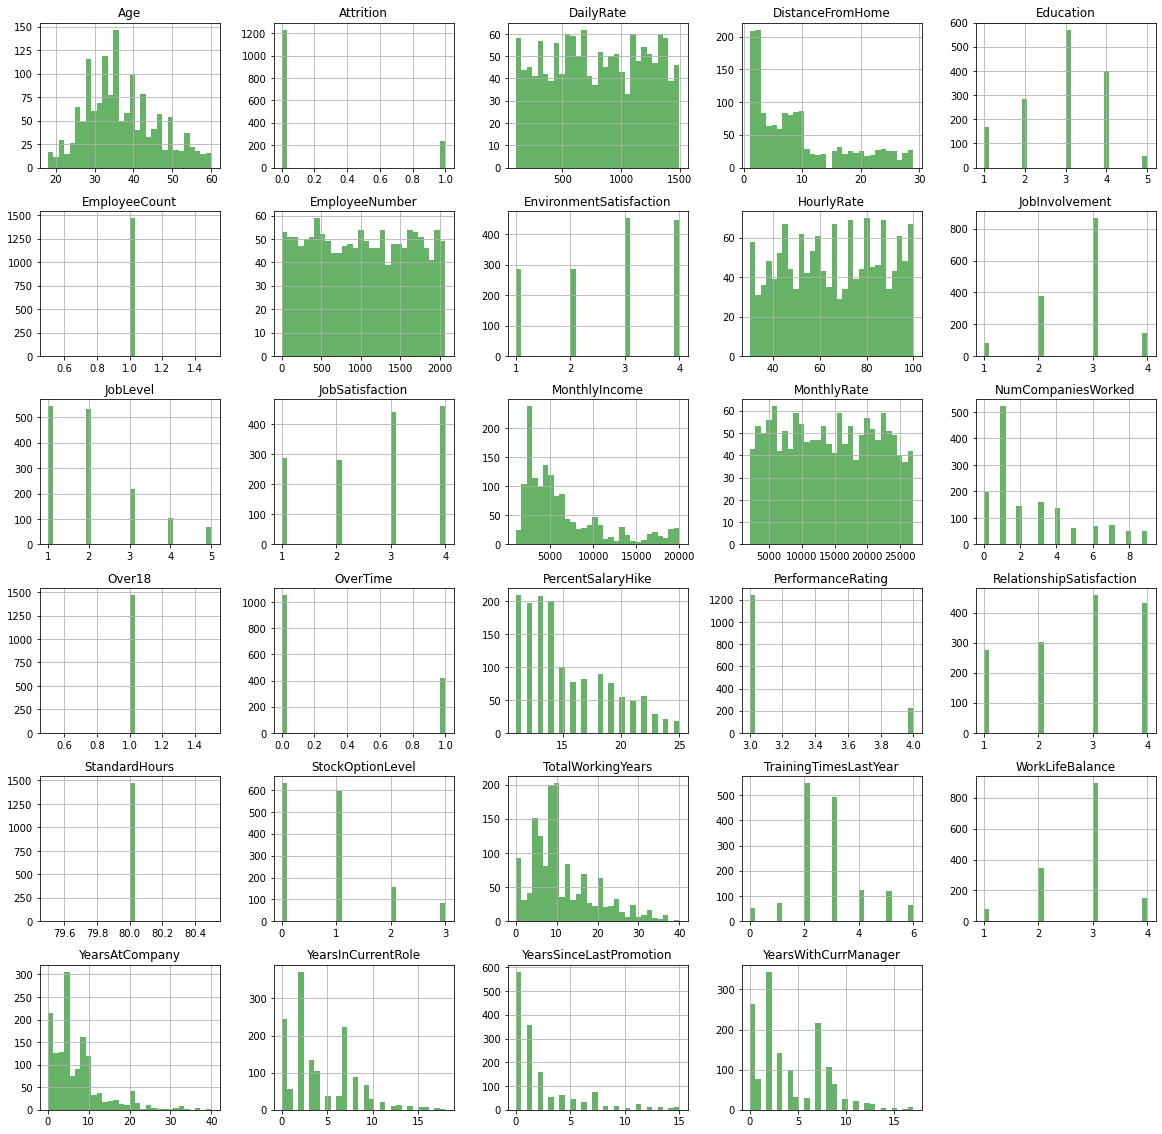

In [30]:
# Several features such as 'MonthlyIncome' and 'TotalWorkingYears' are tail heavy
# It makes sense to drop 'EmployeeCount' and 'Standardhours' since they do not change from one employee to the other

employee_df.hist(bins=30, figsize=(20,20), color='g', alpha=0.6)

In [31]:
# It makes sense to drop 'EmployeeCount' , 'Standardhours' and 'Over18' since they do not change from one employee to the other
# Let's drop 'EmployeeNumber' as well
employee_df.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'], axis=1, inplace=True)

In [32]:
# Let's see how many employees left the company! 
left_df = employee_df[employee_df['Attrition'] ==1]
stayed_df = employee_df[employee_df['Attrition'] ==0]

In [33]:




total = len(employee_df)


print(f'Total employee: {total}, Number of employee who left : {len(left_df)}, Number of employee whi stayed: {len(stayed_df)}')
print(f'% of employee who left : {round(len(left_df)*100/total,2)}, %of employee who stayed {round(len(stayed_df)*100/total,2)} ')

Total employee: 1470, Number of employee who left : 237, Number of employee whi stayed: 1233
% of employee who left : 16.12, %of employee who stayed 83.88 


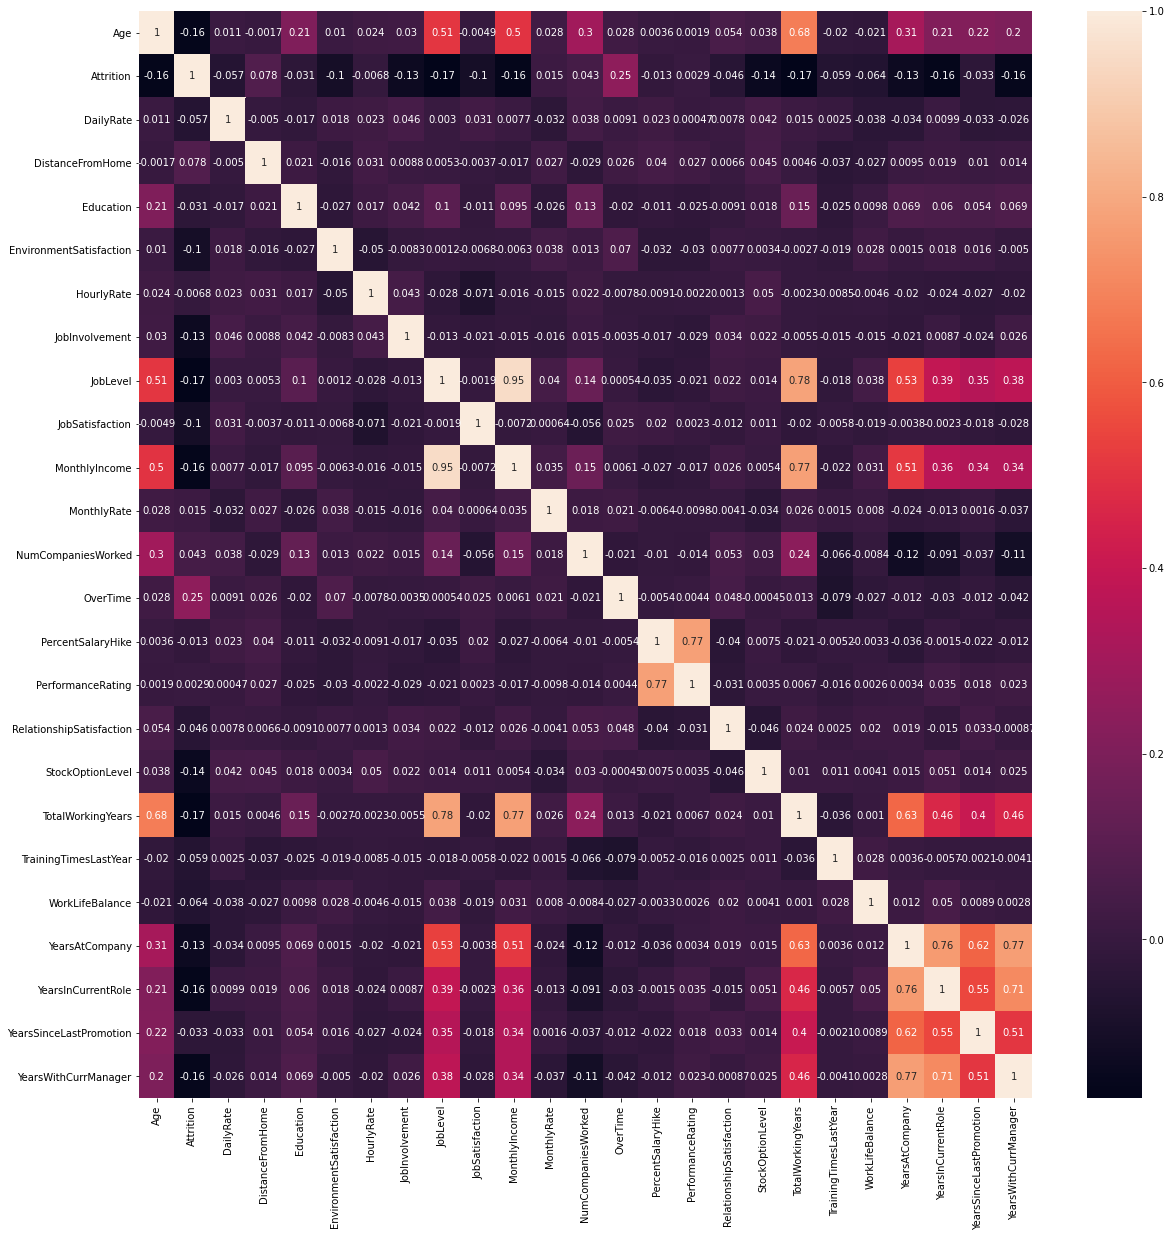

In [34]:
correlations = employee_df.corr()
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations, annot=True)
# Job level is strongly correlated with total working hours
# Monthly income is strongly correlated with Job level
# Monthly income is strongly correlated with total working hours
# Age is stongly correlated with monthly income


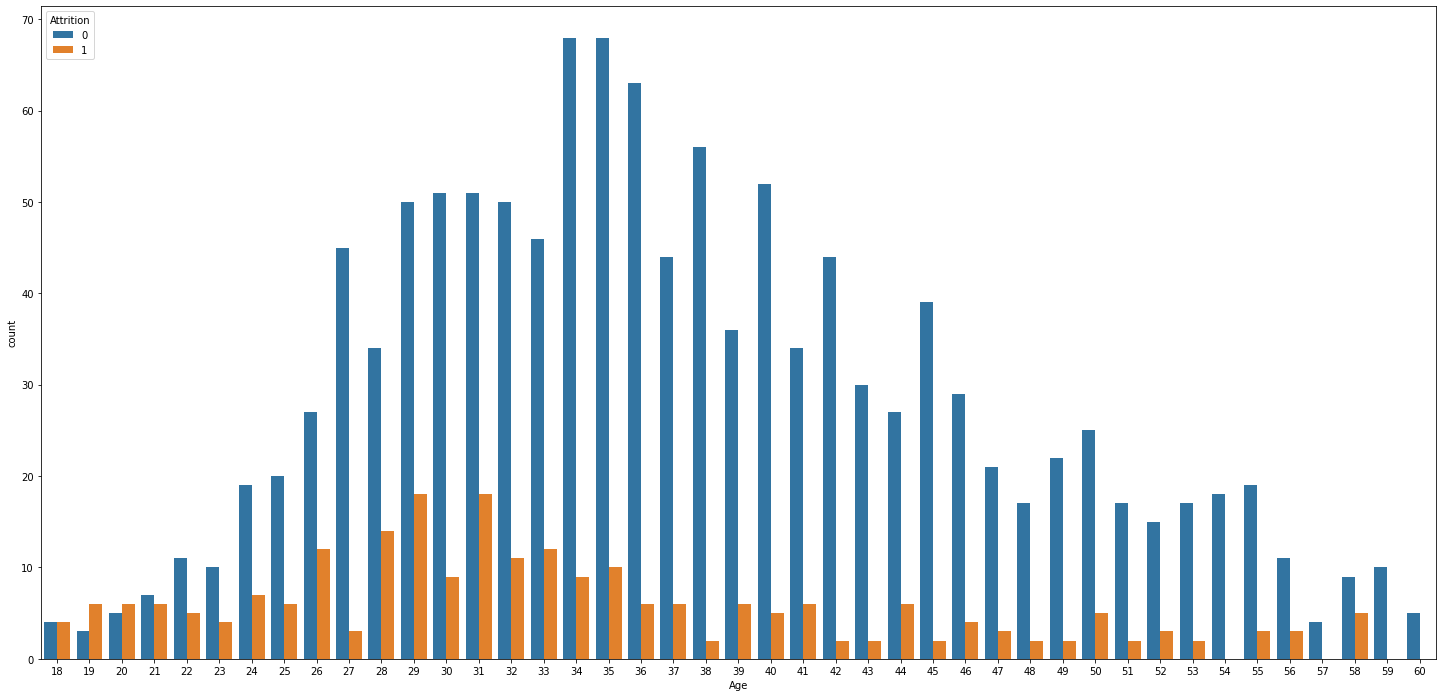

In [35]:
plt.figure(figsize=([25,12]))
sns.countplot(x='Age', hue='Attrition', data=employee_df)

In [36]:
employee_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

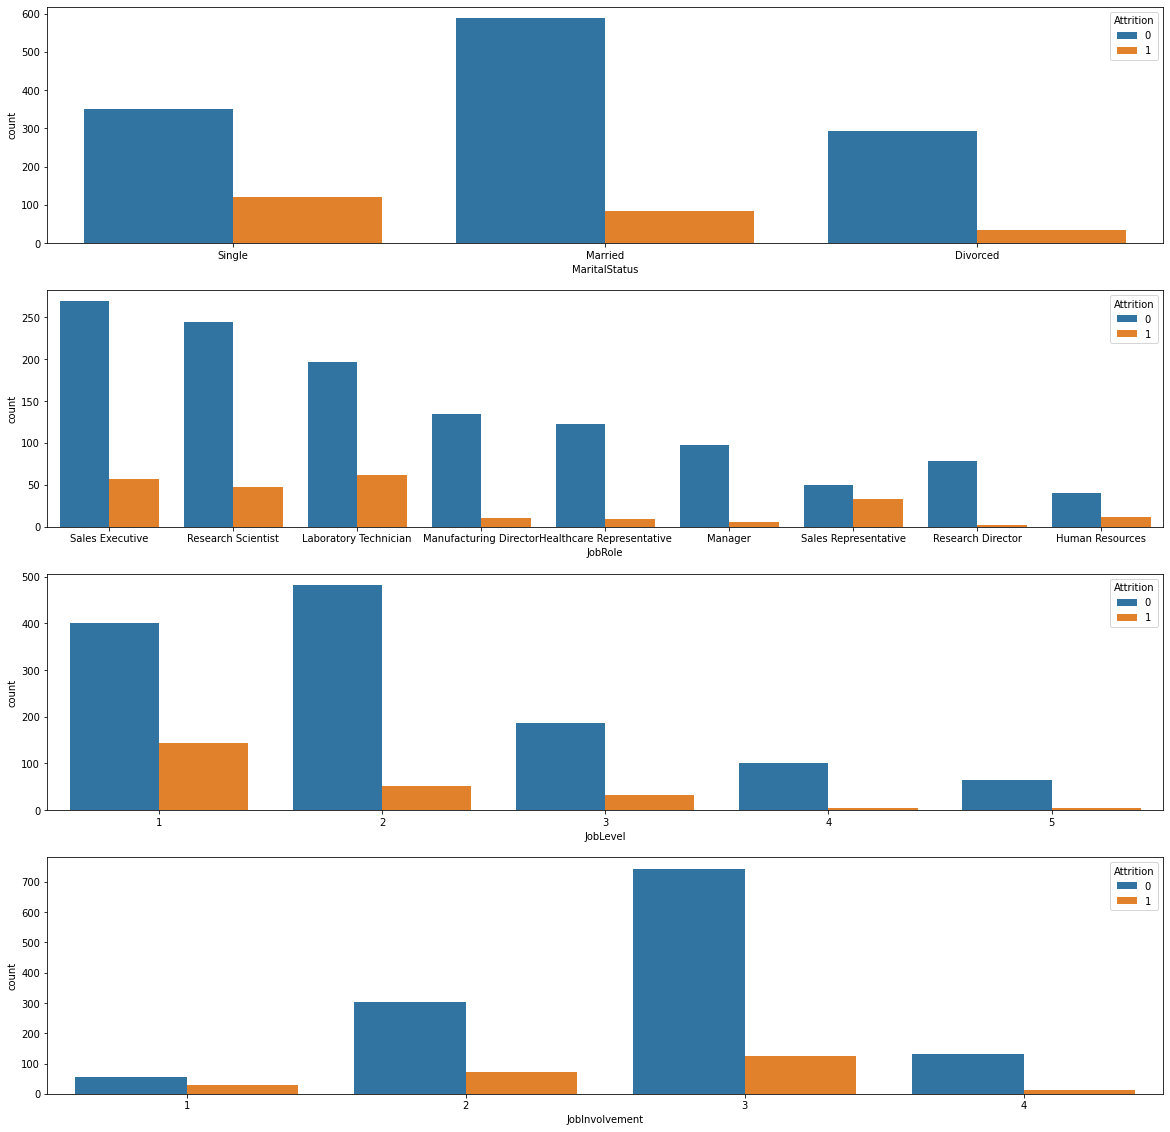

In [37]:
plt.figure(figsize=([20,20]))

plt.subplot(411)
sns.countplot(x='MaritalStatus', hue='Attrition', data=employee_df)

plt.subplot(412)
sns.countplot(x='JobRole', hue='Attrition', data=employee_df)

plt.subplot(413)
sns.countplot(x='JobLevel', hue='Attrition', data=employee_df)

plt.subplot(414)
sns.countplot(x='JobInvolvement', hue='Attrition', data=employee_df)

# Single employees tend to leave compared to married and divorced
# Sales Representitives tend to leave compared to any other job 
# Less involved employees tend to leave the company 
# Less experienced (low job level) tend to leave the company 

Text(0.5, 0, 'Distance From Home')

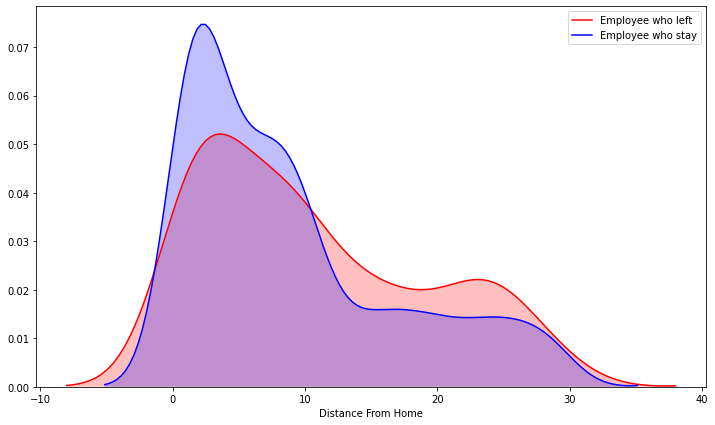

In [38]:
plt.figure(figsize=(12,7))

sns.kdeplot(left_df['DistanceFromHome'], label='Employee who left', shade =True, color='r')
sns.kdeplot(stayed_df['DistanceFromHome'], label='Employee who stay', shade=True,  color='b')

plt.xlabel('Distance From Home')

Text(0.5, 0, 'Years With CurrManager')

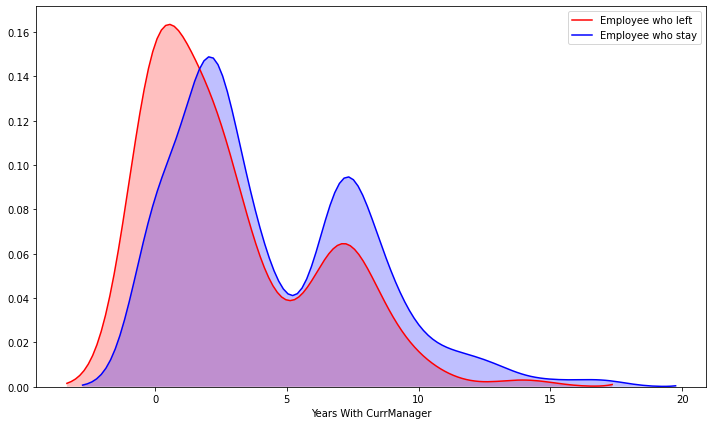

In [39]:
plt.figure(figsize=(12,7))

sns.kdeplot(left_df['YearsWithCurrManager'], label='Employee who left', shade =True, color='r')
sns.kdeplot(stayed_df['YearsWithCurrManager'], label='Employee who stay', shade=True,  color='b')

plt.xlabel('Years With CurrManager')

Text(0.5, 0, 'Total Working Years')

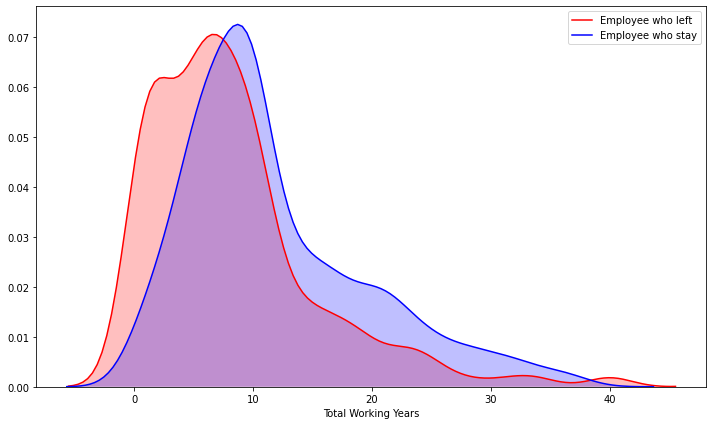

In [40]:
plt.figure(figsize=(12,7))

sns.kdeplot(left_df['TotalWorkingYears'], label='Employee who left', shade =True, color='r')
sns.kdeplot(stayed_df['TotalWorkingYears'], label='Employee who stay', shade=True,  color='b')

plt.xlabel('Total Working Years')

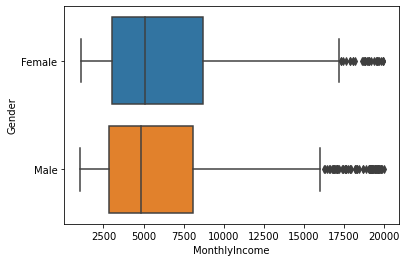

In [41]:
# Let's see the Gender vs. Monthly Income
sns.boxplot(x = 'MonthlyIncome', y='Gender', data=employee_df)

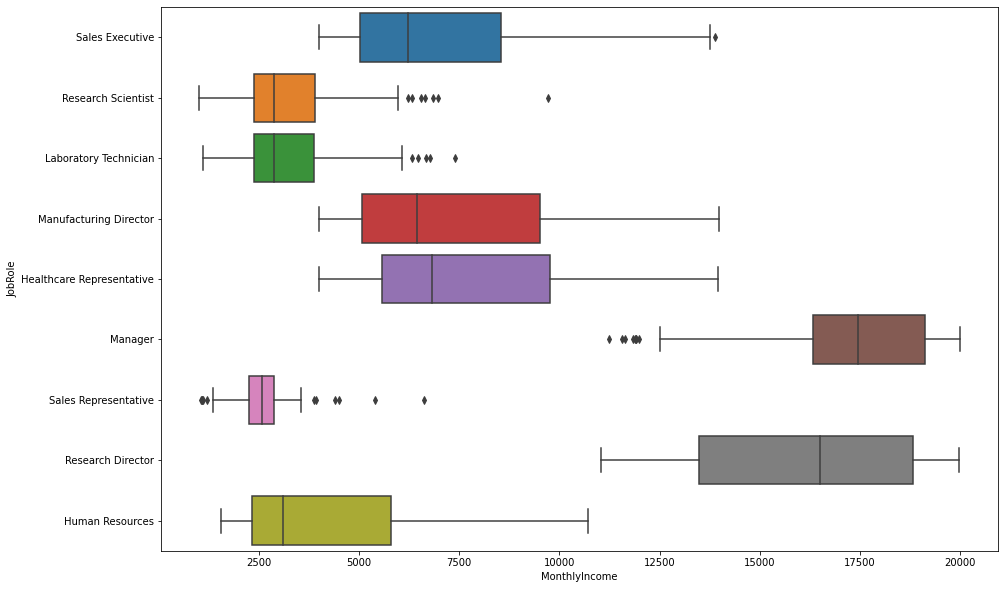

In [42]:
plt.figure(figsize=(15,10))
sns.boxplot(x='MonthlyIncome', y='JobRole', data=employee_df)

## CREATE TESTING AND TRAINING DATASET & PERFORM DATA CLEANING

In [43]:
x_categorical = employee_df.select_dtypes(include=['object']).copy()
x_numerical = employee_df.select_dtypes(exclude=['object']).drop('Attrition', axis=1).copy()


In [44]:
#handle categorical data with one hot endoding
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()

In [45]:
x_categorical = onehotencoder.fit_transform(x_categorical).toarray()

x_categorical =pd.DataFrame(x_categorical)
x_categorical.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [46]:
#scale the numerical values
X_all = pd.concat([x_categorical, x_numerical], axis=1)
X_all

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,41,1102,1,2,2,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,49,279,8,1,3,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,37,1373,2,2,4,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,33,1392,3,4,4,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,27,591,2,1,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,36,884,23,2,3,41,4,2,4,2571,12290,4,0,17,3,3,1,17,3,3,5,2,0,3
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,39,613,6,1,4,42,2,3,1,9991,21457,4,0,15,3,1,1,9,5,3,7,7,1,7
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,27,155,4,3,2,87,4,2,2,6142,5174,1,1,20,4,2,1,6,0,3,6,2,0,3
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,49,1023,2,3,4,63,2,2,2,5390,13243,2,0,14,3,4,0,17,3,2,9,6,0,8


In [50]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X_all)

In [51]:
X

array([[0.        , 0.        , 1.        , ..., 0.22222222, 0.        ,
        0.29411765],
       [0.        , 1.        , 0.        , ..., 0.38888889, 0.06666667,
        0.41176471],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 1.        , ..., 0.11111111, 0.        ,
        0.17647059],
       [0.        , 1.        , 0.        , ..., 0.33333333, 0.        ,
        0.47058824],
       [0.        , 0.        , 1.        , ..., 0.16666667, 0.06666667,
        0.11764706]])

In [49]:
y = employee_df['Attrition']
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

##TRAIN AND EVALUATE A LOGISTIC REGRESSION CLASSIFIER

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)


In [53]:
X_train.shape

(1102, 50)

In [54]:
X_test.shape

(368, 50)

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [57]:
model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [58]:
y_pred = model.predict(X_test)

In [59]:
#What is the model predict
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [60]:
from sklearn.metrics import confusion_matrix, classification_report

In [61]:
print('Acccuracy {} %'.format(100 * accuracy_score(y_pred, y_test)))

Acccuracy 89.40217391304348 %


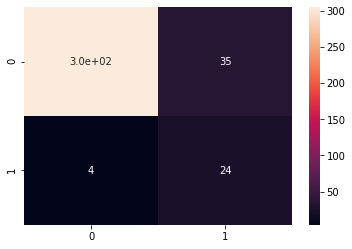

In [62]:
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)

In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       309
           1       0.86      0.41      0.55        59

    accuracy                           0.89       368
   macro avg       0.88      0.70      0.75       368
weighted avg       0.89      0.89      0.88       368



## TRAIN AND EVALUATE A RANDOM FOREST CLASSIFIER

In [64]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [65]:
y_pred = model.predict(X_test)

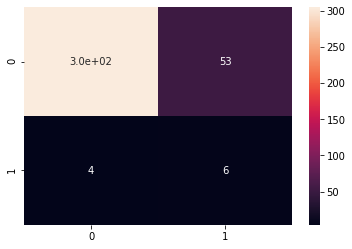

In [67]:
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)

In [68]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91       309
           1       0.60      0.10      0.17        59

    accuracy                           0.85       368
   macro avg       0.73      0.54      0.54       368
weighted avg       0.81      0.85      0.80       368



## TRAIN AND EVALUATE A DEEP LEARNING MODEL 

In [69]:
import tensorflow as tf


In [71]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=500, activation='relu', input_shape=(50,)))
model.add(tf.keras.layers.Dense(units=500, activation='relu'))
model.add(tf.keras.layers.Dense(units=500, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [72]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 500)               25500     
_________________________________________________________________
dense_1 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 501       
Total params: 527,001
Trainable params: 527,001
Non-trainable params: 0
_________________________________________________________________


In [73]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy']  )

In [74]:
epochs_hist = model.fit(X_train, y_train, epochs=100, batch_size=50
                        )

Epoch 1/100
23/23 [==============================] - 0s 9ms/step - loss: 0.4652 - accuracy: 0.8339
Epoch 2/100
23/23 [==============================] - 0s 9ms/step - loss: 0.3763 - accuracy: 0.8475
Epoch 3/100
23/23 [==============================] - 0s 9ms/step - loss: 0.3360 - accuracy: 0.8675
Epoch 4/100
23/23 [==============================] - 0s 8ms/step - loss: 0.3034 - accuracy: 0.8757
Epoch 5/100
23/23 [==============================] - 0s 8ms/step - loss: 0.2777 - accuracy: 0.8866
Epoch 6/100
23/23 [==============================] - 0s 8ms/step - loss: 0.2423 - accuracy: 0.9111
Epoch 7/100
23/23 [==============================] - 0s 9ms/step - loss: 0.2091 - accuracy: 0.9211
Epoch 8/100
23/23 [==============================] - 0s 8ms/step - loss: 0.1743 - accuracy: 0.9356
Epoch 9/100
23/23 [==============================] - 0s 8ms/step - loss: 0.1691 - accuracy: 0.9319
Epoch 10/100
23/23 [==============================] - 0s 9ms/step - loss: 0.1134 - accuracy: 0.9628
Epoch 11/

In [76]:
y_pred = model.predict(X_test)
y_pred = (y_pred>0.5)
y_pred

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [

In [77]:
epochs_hist.history.keys()

dict_keys(['loss', 'accuracy'])

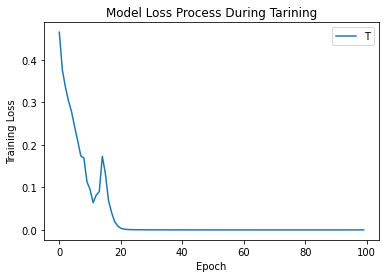

In [78]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Process During Tarining')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend('Trainign Loss')

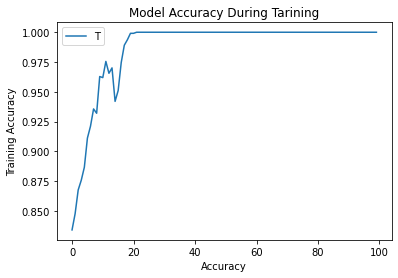

In [79]:
plt.plot(epochs_hist.history['accuracy'])
plt.title('Model Accuracy During Tarining')
plt.xlabel('Accuracy')
plt.ylabel('Training Accuracy')
plt.legend('Trainign Accuracy')

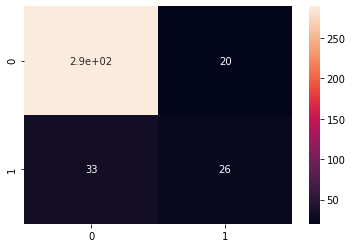

In [80]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [81]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       309
           1       0.57      0.44      0.50        59

    accuracy                           0.86       368
   macro avg       0.73      0.69      0.71       368
weighted avg       0.84      0.86      0.85       368

